In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/yelderiny/Projects/Dissertation/Data/project-data-swift.csv', index_col=[0])

In [3]:
df.head()

,name,language,pull_requests,size,contributors,age,contributor_xp1,contributor_xp2,contributor_xp3,pr_points1,pr_points2,pr_points3
0,vsouza/awesome-ios,Swift,2212,13528,394,3489,8.111,7.571,7.578,9.103,6.588,10.947
0,Alamofire/Alamofire,Swift,555,34100,240,3503,3.308,3.157,2.712,18.562,12.360,20.595
0,kodecocodes/swift-algorithm-club,Swift,607,14104,237,2171,14.784,13.679,9.193,9.241,7.153,9.187
0,MonitorControl/MonitorControl,Swift,146,29842,70,1522,3.688,3.708,4.052,5.286,4.150,6.182
0,ReactiveX/RxSwift,Swift,20,16233,336,1988,6.468,5.999,5.624,1.811,2.087,1.763


In [4]:
df.describe()

,pull_requests,size,contributors,age,contributor_xp1,contributor_xp2,contributor_xp3,pr_points1,pr_points2,pr_points3
count,769.000000,769.000000,769.000000,769.000000,769.00000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,53.149545,10866.461638,22.265280,1593.293888,2.63198,2.505999,2.163342,3.723549,3.439146,3.835814
std,117.534203,17112.351320,34.537304,874.901159,1.57641,1.447060,1.075166,3.510257,2.560982,4.496992
min,5.000000,33.000000,1.000000,23.000000,0.50000,0.500000,0.500000,1.001000,1.001000,1.001000
25%,11.000000,851.000000,7.000000,905.000000,1.66700,1.608000,1.471000,2.006000,1.962000,1.990000
50%,23.000000,3435.000000,12.000000,1554.000000,2.23200,2.141000,1.883000,2.895000,2.754000,2.926000
75%,49.000000,13528.000000,24.000000,2182.000000,3.14800,2.965000,2.545000,4.386000,4.058000,4.440000
max,2212.000000,98692.000000,394.000000,5158.000000,15.49600,14.259000,10.548000,69.397000,35.553000,100.194000


In [5]:
df.isna().sum()

name               0
language           0
pull_requests      0
size               0
contributors       0
age                0
contributor_xp1    0
contributor_xp2    0
contributor_xp3    0
pr_points1         0
pr_points2         0
pr_points3         0
dtype: int64

In [6]:
corrs = df.drop(['name', 'language'], axis=1)
corrs.corr(method='pearson')

,pull_requests,size,contributors,age,contributor_xp1,contributor_xp2,contributor_xp3,pr_points1,pr_points2,pr_points3
pull_requests,1.000000,0.095872,0.806115,0.315797,0.549413,0.550863,0.585514,0.476898,0.482839,0.430782
size,0.095872,1.000000,0.098613,0.047643,0.077309,0.077197,0.088550,0.028505,0.037979,0.011857
contributors,0.806115,0.098613,1.000000,0.384298,0.705720,0.706728,0.725076,0.500416,0.471062,0.469550
age,0.315797,0.047643,0.384298,1.000000,0.393773,0.392724,0.408015,0.210857,0.229599,0.179846
contributor_xp1,0.549413,0.077309,0.705720,0.393773,1.000000,0.999419,0.968462,0.407894,0.417133,0.373535
contributor_xp2,0.550863,0.077197,0.706728,0.392724,0.999419,1.000000,0.973002,0.407464,0.417434,0.372179
contributor_xp3,0.585514,0.088550,0.725076,0.408015,0.968462,0.973002,1.000000,0.396092,0.411779,0.353983
pr_points1,0.476898,0.028505,0.500416,0.210857,0.407894,0.407464,0.396092,1.000000,0.947295,0.981386
pr_points2,0.482839,0.037979,0.471062,0.229599,0.417133,0.417434,0.411779,0.947295,1.000000,0.887787
pr_points3,0.430782,0.011857,0.469550,0.179846,0.373535,0.372179,0.353983,0.981386,0.887787,1.000000


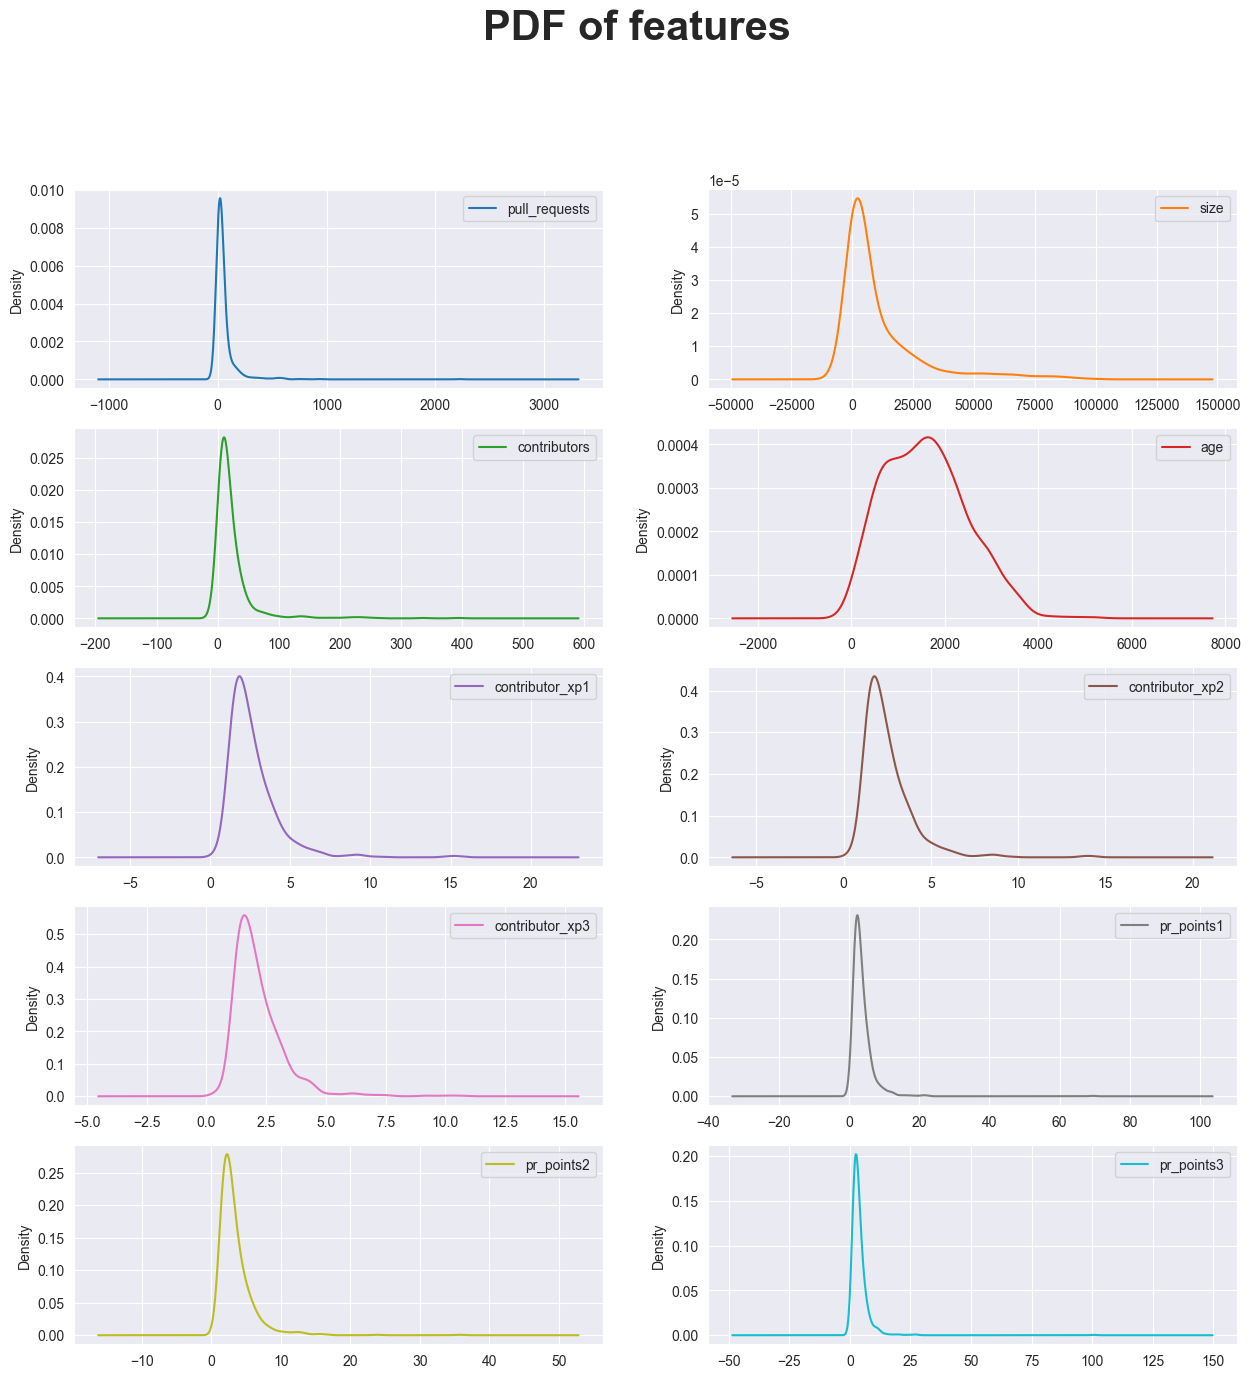

In [7]:
corrs.plot(kind='density', subplots=True, layout=(5,2), fontsize=10, sharex=False, figsize=(15,15))
plt.suptitle('PDF of features', y=1.00, fontweight='bold', fontsize=30)
plt.show()

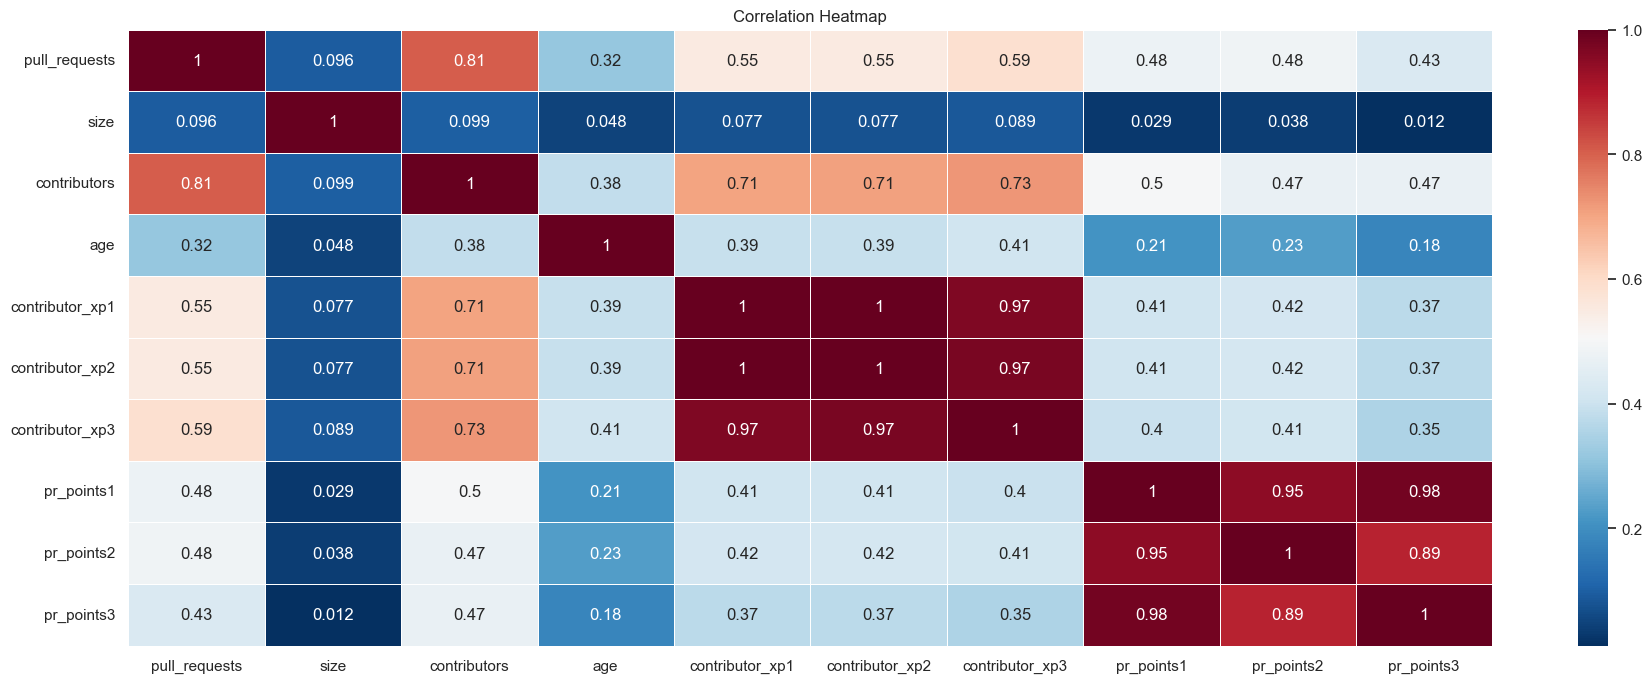

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(22,8))
sns.heatmap(corrs.corr(), annot=True, cmap='RdBu_r', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()